# Wrangling and Analyzing WeRateDogs Dataset

In [2]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open ('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
image_predic = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# I could not get the twitter developper account
with open('tweet_json.txt') as json_file:
    data = [json.loads(line) for line in json_file]
additional_tweet = pd.DataFrame(data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# This instruction displays all columns on the screen
pd.set_option('display.max_columns', None)

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


>- missing values in `twitter_archive` table
>- expanded_urls is unnecessary 

In [6]:
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

> - the source column elements are included in html tag

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> - 181 retweets are undesirable  
> - erroneous data type(in_reply_to_status_id,in_reply_to_user_id,timestamp)
> - None values are considered non-null values

In [212]:
image_predic.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
additional_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


> - id column name 
> - repeated columns of the same elements different types (id and id_str...)

In [24]:
additional_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [12]:
additional_tweet.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

> - mising values and empty columns
> - undesirable retweets
> - one column (entities) contains several variables

In [66]:
additional_tweet_clean.display_text_range


0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
2349    [0, 120]
2350    [0, 137]
2351    [0, 130]
2352    [0, 139]
2353    [0, 131]
Name: display_text_range, Length: 2354, dtype: object

> - display_text_range elements type is list 

### Quality issues
#### `twitter_archive` table

1.missing values in several columns 

2.the source column elements are included in html tag 

3.181 status are retweets hence they are undesirable 

4.erroneous data type (in_reply_to_status_id, in_reply_to_user_id, timestamp) 

5.None values from name to puppo columns are considered as non-null values

6.expanded_urls is unnecessary since we already have tweet_id

#### `additional_tweet` table

7.erroneous data type: display_text_range elements are lists instead of integers 

8.171 undesirable retweeted status 

9.empty columns (coordinates,geo..)

10.column named id istead of tweet_id name

 in all tables tweet_id type is int not str

### Tidiness issues
#### `additional_tweet` table

1.one column (entities, user) contains several variables 

2.repeated columns of the same elements in different types (id and id_str...)

Merging the data in the two tables into one master dataframe


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
image_predic_clean = image_predic.copy()
additional_tweet_clean = additional_tweet.copy()
twitter_archive_clean =twitter_archive.copy()

### Missing Data:

#### Define:  Missing values and retweets in `twitter_archive` 
Remove all retweeted status rows, remove all columns with incomplete informations and are not crucial: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id ,retweeted_status_user_id ,retweeted_status_timestamp ,expanded_urls and source columns.

#### Code

In [35]:
# removing all retweets
twitter_archive_clean.drop(twitter_archive_clean.index[twitter_archive_clean['retweeted_status_id'].notnull()], inplace=True) 

In [36]:
# removing columns from retweeted_status_id to expanded_urls
twitter_archive_clean.drop(twitter_archive_clean.loc[:, 'retweeted_status_id':'expanded_urls'].columns, axis=1, inplace=True)

In [37]:
# removing remaining incomplete columns 
twitter_archive_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'source'], inplace=True)

#### Test

In [12]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### Define:  Missing values and retweets in `additional_tweet` 
Remove all retweeted status, and all undesirable or empty columns.


#### Code

In [38]:
# This instruction removes all retweeted status
additional_tweet_clean.drop(additional_tweet_clean.index[additional_tweet_clean['retweeted_status'].notnull()], inplace=True) 
# Removing all columns from in_reply_to_status_id to in_reply_to_screen_name
additional_tweet_clean.drop(additional_tweet_clean.loc[:, 'in_reply_to_status_id':'in_reply_to_screen_name'].columns, axis=1, inplace=True)
# Removing all columns from geo to contributors
additional_tweet_clean.drop(additional_tweet_clean.loc[:, 'geo':'contributors'].columns, axis=1, inplace=True)
# Removing all columns from retweeted_status to quoted_status
additional_tweet_clean.drop(additional_tweet_clean.loc[:, 'retweeted_status':'quoted_status'].columns, axis=1, inplace=True)

#### Test

In [14]:
additional_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2175 non-null   object
 1   id                             2175 non-null   int64 
 2   id_str                         2175 non-null   object
 3   full_text                      2175 non-null   object
 4   truncated                      2175 non-null   bool  
 5   display_text_range             2175 non-null   object
 6   entities                       2175 non-null   object
 7   extended_entities              1994 non-null   object
 8   source                         2175 non-null   object
 9   user                           2175 non-null   object
 10  is_quote_status                2175 non-null   bool  
 11  retweet_count                  2175 non-null   int64 
 12  favorite_count                 2175 non-null   int64 
 13  fav

#### Define:  Formating the timestamp and other columns in `twitter_archive_clean`
Change the timestamp data type to date, and remove the suffix at its end '+0000', then replacing None values to NaNs in columns from name to puppo

#### Code

In [42]:
# Delete the +0000 at the end
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-5]
# Change the format to date
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [43]:
# Replacing None string values bay NaNs
for value in twitter_archive_clean.loc[: ,'name':'puppo'].columns:
    twitter_archive_clean[value] = twitter_archive_clean[value].replace('None', np.nan)

#### Test

In [158]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2170 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                1495 non-null   object        
 6   doggo               87 non-null     object        
 7   floofer             10 non-null     object        
 8   pupper              234 non-null    object        
 9   puppo               25 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### Tidiness:

#### Define: duplicated columns in `additional_tweet`
Remove all duplicated columns ,and columns that already exists in `twitter_archive` which are created_at,id_str ,truncated ,full_text,retweeted ,entities ,extended_entities ,source ,user.

#### Code

In [39]:
# Removing Undesirable or incomplete columns
additional_tweet_clean.drop(additional_tweet_clean.loc[:, 'entities':'user'].columns, axis=1, inplace=True)
additional_tweet_clean.drop(columns =['created_at', 'id_str', 'truncated', 'full_text', 'retweeted'], inplace=True)

#### Test

In [117]:
additional_tweet_clean.columns

Index(['id', 'truncated', 'display_text_range', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'],
      dtype='object')

#### Define: handling id and display_text_range columns in `additional_tweet`
Rename the column id to tweet_id like in `twitter_archive` ,then rename display_text_range to text_length and change this column values to become integers representing the length of the text.

#### Code

In [40]:
# Renaming columns
additional_tweet_clean.rename(columns={'id': 'tweet_id', 'display_text_range': 'text_length'}, inplace=True) 

In [41]:
# Changing lists by integers text_length
additional_tweet_clean.loc[:, 'text_length'] = list(map(lambda x: x[1], additional_tweet_clean.loc[:, 'text_length']))

#### Test

In [20]:
additional_tweet_clean.head()

,tweet_id,text_length,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,85,False,8853,39467,False,False,False,en
1,892177421306343426,138,False,6514,33819,False,False,False,en
2,891815181378084864,121,False,4328,25461,False,False,False,en
3,891689557279858688,79,False,8964,42908,False,False,False,en
4,891327558926688256,138,False,9774,41048,False,False,False,en


#### Define:  Merging the two dataframes 
Merge the two dataframes `twitter_archive_clean` and `additional_tweet_clean` by their tweet_id in commun, and remove all columns from doggo to puppo since they don't have enough informations.

#### Code

In [44]:
# Merging the two dataframes
new_twitter = pd.merge(twitter_archive_clean, additional_tweet_clean, on = 'tweet_id')
# Removing incomplete columns 
new_twitter.drop(new_twitter.loc[:, 'doggo':'puppo'].columns, axis=1, inplace=True)

#### Test

In [198]:
new_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       2175 non-null   int64         
 1   timestamp                      2175 non-null   datetime64[ns]
 2   text                           2175 non-null   object        
 3   rating_numerator               2175 non-null   int64         
 4   rating_denominator             2175 non-null   int64         
 5   name                           1495 non-null   object        
 6   text_length                    2175 non-null   int64         
 7   is_quote_status                2175 non-null   bool          
 8   retweet_count                  2175 non-null   int64         
 9   favorite_count                 2175 non-null   int64         
 10  favorited                      2175 non-null   bool          
 11  possibly_sensitiv

#### Define: Final modification
Leave only the rows that have the tweet_id in common, in both dataframes new_twitter and image_predic_clean, then change the type of tweet_id to string in both of them.

#### Code

In [45]:
# Leaving only rows in common between new_twitter and image_predic_clean
new_twitter = new_twitter.loc[new_twitter['tweet_id'].isin(image_predic_clean.tweet_id)]
image_predic_clean = image_predic_clean.loc[image_predic_clean['tweet_id'].isin(new_twitter.tweet_id)]
# Reset the index 
new_twitter.reset_index(inplace = True, drop = True)
image_predic_clean.reset_index(inplace = True, drop = True)

In [46]:
# Changing the type of tweet_id to str
new_twitter.tweet_id = new_twitter.tweet_id.astype(str)
image_predic_clean.tweet_id = image_predic_clean.tweet_id.astype(str)

#### Test

In [50]:
image_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1994 non-null   object 
 1   jpg_url   1994 non-null   object 
 2   img_num   1994 non-null   int64  
 3   p1        1994 non-null   object 
 4   p1_conf   1994 non-null   float64
 5   p1_dog    1994 non-null   bool   
 6   p2        1994 non-null   object 
 7   p2_conf   1994 non-null   float64
 8   p2_dog    1994 non-null   bool   
 9   p3        1994 non-null   object 
 10  p3_conf   1994 non-null   float64
 11  p3_dog    1994 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 146.2+ KB


In [48]:
new_twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,text_length,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,85,False,8853,39467,False,False,False,en
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,138,False,6514,33819,False,False,False,en
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,121,False,4328,25461,False,False,False,en
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,79,False,8964,42908,False,False,False,en
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,138,False,9774,41048,False,False,False,en


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
# saving new dataframes in csv files
new_twitter.to_csv('twitter_archive_master.csv', index = False)
image_predic_clean.to_csv('image_predictions_v2.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [3]:
tweets_info = pd.read_csv('twitter_archive_master.csv')
tweets_predic = pd.read_csv('image_predictions_v2.csv')

In [4]:
# sorting tweets_info values to match the order in tweets_predic
tweets_info = tweets_info.sort_values('tweet_id')
tweets_info.reset_index(inplace = True, drop = True)

### The average of text length

In [5]:
tweets_info.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,text_length,is_quote_status,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,lang
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,131,False,532,2535,False,False,False,en
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,a,139,False,48,132,False,False,False,en
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,a,130,False,47,128,False,False,False,en
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,137,False,147,311,False,False,False,en
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,120,False,41,111,False,False,False,en


In [6]:
tweets_predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Filtering to only have tweets with true value in the three columns then calculating the mean
tweets_info[tweets_predic.p1_dog*tweets_predic.p2_dog*tweets_predic.p3_dog].text_length.mean()

111.04488778054863

### The proportion of  scores (+10) of tweets 

In [35]:
high_ratings = tweets_info.query('rating_numerator >= 10').rating_numerator.value_counts()
high_ratings

12      450
10      419
11      396
13      261
14       35
80        1
24        1
75        1
27        1
165       1
1776      1
204       1
50        1
99        1
60        1
45        1
44        1
143       1
121       1
26        1
144       1
88        1
420       1
84        1
Name: rating_numerator, dtype: int64

In [36]:
# We remove non_repeated elements
high_ratings = high_ratings.loc[range(10,15)].sort_index()

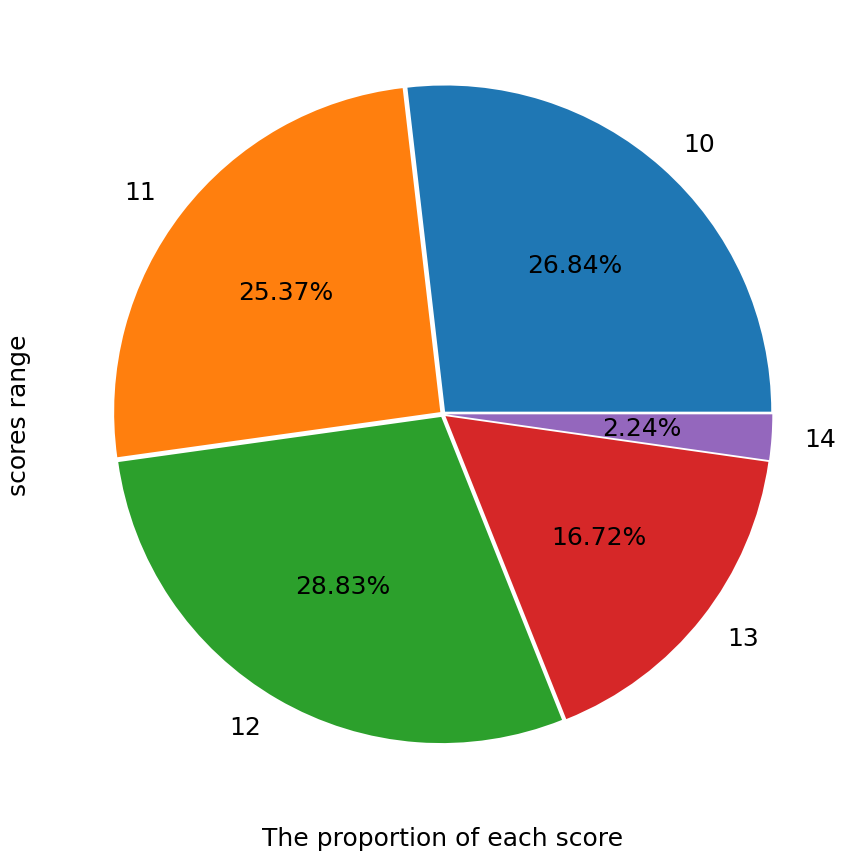

In [95]:
high_ratings.plot(kind = 'pie', autopct='%1.2f%%', explode=(0.01, 0.01, 0.01,0.01 ,0.01 ))
plt.xlabel('The proportion of each score')
plt.ylabel('scores range');

### The name and race of the dog from top 10

In [98]:
top10_fovorite = tweets_info.favorite_count.sort_values(ascending = False).index[:10]
top10_retweeted = tweets_info.retweet_count.sort_values(ascending = False).index[:10]

In [99]:
top10_fovorite,top10_retweeted

(Int64Index([1684, 1218, 1935, 1593, 1885, 1660, 1900, 1591, 1858, 1183], dtype='int64'),
 Int64Index([1218, 1593, 1183, 1684, 1935, 1660, 1591, 1356, 1885, 511], dtype='int64'))

In [100]:
top_all = top10_fovorite[top10_fovorite.isin(top10_retweeted)]
tweets_predic.loc[top_all].sort_index()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1183,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
1218,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
1591,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1593,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1660,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1684,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1885,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
1935,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


In [97]:
tweets_info.loc[1885].loc['name'],tweets_predic.loc[top_all].sort_index().loc[1885].p1

('Jamesy', 'French_bulldog')

### Insights:
1.The average of text length for images that have true value in the three columns p1_dog, p2_dog and p3_dog is about 111 characters.

2.The proportion of scores of tweets scoring +10 (10/10 or more) after eliminating non-repeated scores is distributed by the range values 10 to 14, with 12 has the highest percentage 28.83%, and 14 has the lowest 2.24%. 

3.The name of the dog from top 10 favorited tweets and retweeted and has the highest probability p1_conf is Jamesy and it is a French_bulldog

### Visualization

In [97]:
most_names = tweets_info.name.value_counts().head(10)
most_names

a          55
Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Tucker      9
Winston     8
Sadie       8
the         7
Name: name, dtype: int64

In [55]:
most_names = most_names.loc['Charlie':'Sadie']

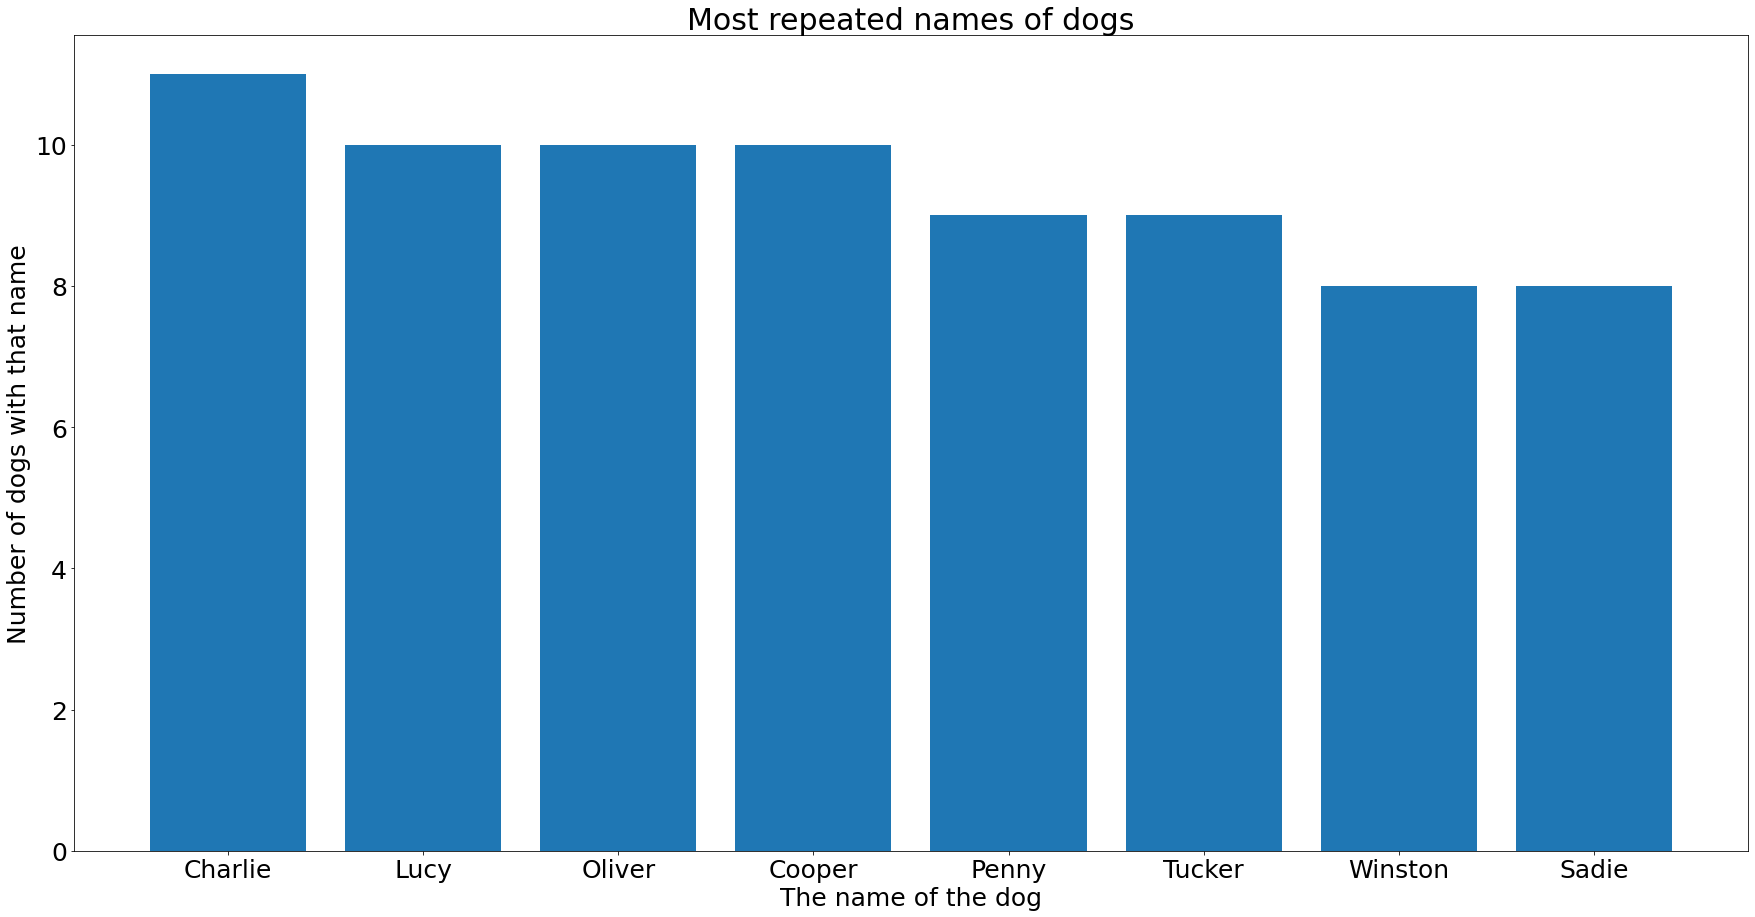

In [56]:
plt.rcParams.update({'font.size': 25})
plt.rcParams["figure.figsize"] = [30,15]
plt.title('Most repeated names of dogs')
plt.bar(x = most_names.index, height = most_names)
plt.xlabel('The name of the dog')
plt.ylabel('Number of dogs with that name');